In [48]:
from datetime import datetime

# Импорт библиотек
import pandas as pd
import duckdb as ddb
from IPython.display import display
import seaborn as sns
import matplotlib.pyplot as plt

# Задание таблиц БД
users = pd.read_csv('users.csv')
course_users = pd.read_csv('course_users.csv')
courses = pd.read_csv('courses.csv')
course_types = pd.read_csv('course_types.csv')
lessons = pd.read_csv('lessons.csv')
subjects = pd.read_csv('subjects.csv')
cities = pd.read_csv('cities.csv')
homework_done = pd.read_csv('homework_done.csv')
homework = pd.read_csv('homework.csv')
homework_lessons = pd.read_csv('homework_lessons.csv')
user_roles = pd.read_csv('user_roles.csv') 

# Создание запроса к базе данных
query = """
WITH courses_info AS 
(SELECT c.id as course_id, c.name as course_name, c.starts_at as course_start_date, 
s.id as subject_id, s.name as subject_name, s.project as subject_type,
c_t.id as course_type_id, c_t.name as course_type_name, c.lessons_in_month as les_mon
FROM courses c inner join subjects s on c.subject_id = s.id
inner join course_types c_t on c.course_type_id = c_t.id
),

users_info AS
(SELECT u.id as user_id, u.last_name as user_last_name, cit.id as city_id, cit.name as city_name, 
c_u.active as student_not_expelled, c_u.created_at as course_opening_date, c_u.course_id as c_id,
c_u.available_lessons as av_les
FROM users u left join cities cit on u.city_id = cit.id
inner join user_roles u_r on u.user_role_id = u_r.id
inner join course_users c_u on u.id = c_u.user_id
WHERE u_r.name = 'student'),

homework_info AS
(SELECT user_id as u_id, l.course_id as c_id, count(hw_d.id) as homework_done_on_course_by_user
FROM homework_done hw_d inner join homework_lessons hw_l on hw_d.homework_id = hw_l.homework_id
inner join lessons l on hw_l.lesson_id = l.id
GROUP BY u_id, c_id)

SELECT course_id, course_name, subject_id, subject_name, subject_type, course_type_id, course_start_date, user_id,
user_last_name, city_id, city_name, student_not_expelled, course_opening_date, 
av_les/NULLIF(les_mon, 0)::int as user_course_month_count, homework_done_on_course_by_user
FROM users_info u_i inner join courses_info c_i on u_i.c_id = c_i.course_id
left join homework_info h_i on h_i.u_id = u_i.user_id AND h_i.c_id = c_i.course_id
ORDER BY course_id
"""

# Выполнение SQL-запроса
df_result = ddb.query(query).to_df()

# Вывод результата
display(df_result)

,course_id,course_name,subject_id,subject_name,subject_type,course_type_id,course_start_date,user_id,user_last_name,city_id,city_name,student_not_expelled,course_opening_date,user_course_month_count,homework_done_on_course_by_user
0,16,Годовой 2к25 стандарт,1,Обществознание,ЕГЭ,1,2024-09-16,10233,Романова,786,Тольятти,1,2024-07-29 16:42:04,3.0,16
1,16,Годовой 2к25 стандарт,1,Обществознание,ЕГЭ,1,2024-09-16,10280,Зуева,796,Санкт-Петербург,1,2024-07-30 08:52:44,1.0,3
2,16,Годовой 2к25 стандарт,1,Обществознание,ЕГЭ,1,2024-09-16,10349,Никитина,844,Екатеринбург,1,2024-07-30 16:45:46,9.0,14
3,16,Годовой 2к25 стандарт,1,Обществознание,ЕГЭ,1,2024-09-16,10421,Галимзянова,316,Киселёвск,1,2024-07-31 11:17:10,2.0,15
4,16,Годовой 2к25 стандарт,1,Обществознание,ЕГЭ,1,2024-09-16,10532,Субботина,924,Тамбов,1,2024-07-31 18:22:07,2.0,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15339,104,СПЕЦКУРС ПО КАРТАМ,3,История,ЕГЭ,3,2024-11-10,33030,Лебедева,812,Саратов,1,2024-11-10 13:21:37,NaN,<NA>
15340,104,СПЕЦКУРС ПО КАРТАМ,3,История,ЕГЭ,3,2024-11-10,33115,Ларгина,508,Москва,1,2024-11-10 13:21:37,NaN,<NA>
15341,104,СПЕЦКУРС ПО КАРТАМ,3,История,ЕГЭ,3,2024-11-10,33284,Www,508,Москва,1,2024-11-10 13:21:37,NaN,<NA>
15342,104,СПЕЦКУРС ПО КАРТАМ,3,История,ЕГЭ,3,2024-11-10,33560,Перловка,828,Холмск,1,2024-11-10 13:21:37,NaN,<NA>


In [49]:
# Определим типы данных, проверим количество строк и столбцов, обнаружим столбцы с пропусками
df_result.info()
df_result.head(20)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15344 entries, 0 to 15343
Data columns (total 15 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   course_id                        15344 non-null  int64  
 1   course_name                      15344 non-null  object 
 2   subject_id                       15344 non-null  int64  
 3   subject_name                     15344 non-null  object 
 4   subject_type                     15344 non-null  object 
 5   course_type_id                   15344 non-null  int64  
 6   course_start_date                15344 non-null  object 
 7   user_id                          15344 non-null  int64  
 8   user_last_name                   15344 non-null  object 
 9   city_id                          14373 non-null  Int64  
 10  city_name                        14373 non-null  object 
 11  student_not_expelled             15344 non-null  int64  
 12  course_opening_dat

,course_id,course_name,subject_id,subject_name,subject_type,course_type_id,course_start_date,user_id,user_last_name,city_id,city_name,student_not_expelled,course_opening_date,user_course_month_count,homework_done_on_course_by_user
0,16,Годовой 2к25 стандарт,1,Обществознание,ЕГЭ,1,2024-09-16,10233,Романова,786,Тольятти,1,2024-07-29 16:42:04,3.0,16
1,16,Годовой 2к25 стандарт,1,Обществознание,ЕГЭ,1,2024-09-16,10280,Зуева,796,Санкт-Петербург,1,2024-07-30 08:52:44,1.0,3
2,16,Годовой 2к25 стандарт,1,Обществознание,ЕГЭ,1,2024-09-16,10349,Никитина,844,Екатеринбург,1,2024-07-30 16:45:46,9.0,14
3,16,Годовой 2к25 стандарт,1,Обществознание,ЕГЭ,1,2024-09-16,10421,Галимзянова,316,Киселёвск,1,2024-07-31 11:17:10,2.0,15
4,16,Годовой 2к25 стандарт,1,Обществознание,ЕГЭ,1,2024-09-16,10532,Субботина,924,Тамбов,1,2024-07-31 18:22:07,2.0,17
5,16,Годовой 2к25 стандарт,1,Обществознание,ЕГЭ,1,2024-09-16,10647,Филимонова,649,Новосибирск,1,2024-08-02 07:49:46,2.0,15
6,16,Годовой 2к25 стандарт,1,Обществознание,ЕГЭ,1,2024-09-16,10683,Горшенёва,561,Подольск,1,2024-08-04 18:35:10,2.0,9
7,16,Годовой 2к25 стандарт,1,Обществознание,ЕГЭ,1,2024-09-16,10696,Матвеев,508,Москва,1,2024-08-02 17:48:09,2.0,17
8,16,Годовой 2к25 стандарт,1,Обществознание,ЕГЭ,1,2024-09-16,10702,Плеханова,139,Фролово,1,2024-08-26 16:22:57,1.0,8
9,16,Годовой 2к25 стандарт,1,Обществознание,ЕГЭ,1,2024-09-16,10718,Коголь,977,Томск,1,2024-08-03 08:53:49,2.0,16


In [50]:
# Обработка пропусков
# Не по всем ученикам есть информация о городе, видимо, это необязательная информация, заменим пропуски на 0 для айди и на "нет данных" для названия
df = df_result
df['city_id'] = df_result['city_id'].fillna(0)
df['city_name'] = df_result['city_name'].fillna('нет данных')
# Количество месяцев на курсе также заполнено не для всех пользователей. Полагаю, некоторые пользователи не открыли ни одного урока, дело в этом, соответственно, заменим пропускина нули
df['user_course_month_count'] = df_result['user_course_month_count'].fillna(0).astype(int)
# Количество выполненных домашних заданий на курсе также содержит пропуски, что означает отсутствие выполненных д/з, заменяем пропуски на нули
df['homework_done_on_course_by_user'] = df_result['homework_done_on_course_by_user'].fillna(0)

In [51]:
# Обработка типов данных
# Все поля id должны быть целочисленными, однако айди города почему-то имеет тип float, проверим, что в этом столбце нет нецелых значений
print((df['city_id'] % 1 != 0).sum())
# Получили 0, значит, можем изменить тип данных на int64
df['city_id'] = df['city_id'].astype('int64')
# Проверим, есть ли НЕ целые числа в столбце с количеством месяцев
print((df['user_course_month_count'] % 1 != 0).sum())
# Получили 0, значит, можем изменить тип данных на int64
df['user_course_month_count'] = df['user_course_month_count'].astype('int64')


0
0


In [53]:
# Столбцы с названием курса, названием и типом предмета, фамилией пользователя и названием города преобразуем в строковый тип,
# но для начала проверим, что тип данных действительно строковый в этих столбцах
print(df['course_name'].apply(lambda x: isinstance(x, str)).all())
print(df['subject_name'].apply(lambda x: isinstance(x, str)).all())
print(df['subject_type'].apply(lambda x: isinstance(x, str)).all())
print(df['user_last_name'].apply(lambda x: isinstance(x, str)).all())
print(df['city_name'].apply(lambda x: isinstance(x, str)).all())
# Все значения True, значит, можем спокойно выполнить преобразование
df['course_name'] = df['course_name'].astype("string")
df['subject_name'] = df['subject_name'].astype("string")
df['subject_type'] = df['subject_type'].astype("string")
df['user_last_name'] = df['user_last_name'].astype("string")
df['city_name'] = df['city_name'].astype("string")


True
True
True
True
True


In [54]:
# Теперь остаётся проверить, все ли данные в столбцах с датами являются датами, и провести соответствующие преобразования
print(df['course_start_date'].apply(lambda x: isinstance(x, (pd.Timestamp, datetime))).all())
print(df['course_opening_date'].apply(lambda x: isinstance(x, (pd.Timestamp, datetime))).all())
# Это не даты, возможно, это тоже строки
print(df['course_start_date'].apply(lambda x: isinstance(x, (pd.Timestamp, str))).all())
print(df['course_opening_date'].apply(lambda x: isinstance(x, (pd.Timestamp, str))).all())
# да, строки, преобразуем их в даты-время и проверим, есть ли неудачно преобразованные строки
df['course_start_date'] = pd.to_datetime(df['course_start_date'], errors='coerce')
df['course_opening_date'] = pd.to_datetime(df['course_opening_date'], errors='coerce')
print(df[df['course_start_date'].isna()])
print(df[df['course_opening_date'].isna()])


False
False
True
True
Empty DataFrame
Columns: [course_id, course_name, subject_id, subject_name, subject_type, course_type_id, course_start_date, user_id, user_last_name, city_id, city_name, student_not_expelled, course_opening_date, user_course_month_count, homework_done_on_course_by_user]
Index: []
Empty DataFrame
Columns: [course_id, course_name, subject_id, subject_name, subject_type, course_type_id, course_start_date, user_id, user_last_name, city_id, city_name, student_not_expelled, course_opening_date, user_course_month_count, homework_done_on_course_by_user]
Index: []


In [55]:
# Преобразуем также тип данных столбца "студент не отчислен" к логическому с предварительной заменой 1 и 0
df['student_not_expelled'] = df['student_not_expelled'].apply(
    lambda x: True if x == 1
    else False if x == 0
    else pd.NA
)
print(df[df['student_not_expelled'].isna()])
df.info()


Empty DataFrame
Columns: [course_id, course_name, subject_id, subject_name, subject_type, course_type_id, course_start_date, user_id, user_last_name, city_id, city_name, student_not_expelled, course_opening_date, user_course_month_count, homework_done_on_course_by_user]
Index: []
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15344 entries, 0 to 15343
Data columns (total 15 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   course_id                        15344 non-null  int64         
 1   course_name                      15344 non-null  string        
 2   subject_id                       15344 non-null  int64         
 3   subject_name                     15344 non-null  string        
 4   subject_type                     15344 non-null  string        
 5   course_type_id                   15344 non-null  int64         
 6   course_start_date                15344 non-null  date

In [56]:
# Проверка на наличие дубликатов
print(df.duplicated().sum())
# Дубликатов не обнаружено

0


          course_id    subject_id  course_type_id  \
count  15344.000000  15344.000000    15344.000000   
mean      51.845738      4.894161        2.287213   
min       16.000000      1.000000        1.000000   
25%       22.000000      3.000000        1.000000   
50%       41.000000      4.000000        3.000000   
75%       88.000000      7.000000        3.000000   
max      104.000000     15.000000        6.000000   
std       32.597120      2.961529        1.038691   

                   course_start_date      user_id       city_id  \
count                          15344  15344.00000  15344.000000   
mean   2024-09-23 14:36:54.807090688  22857.46005    554.594695   
min              2024-06-18 00:00:00  10001.00000      0.000000   
25%              2024-09-16 00:00:00  10765.00000    333.000000   
50%              2024-09-20 00:00:00  25665.00000    516.000000   
75%              2024-10-24 00:00:00  30200.50000    796.000000   
max              2025-11-06 00:00:00  33999.00000   1

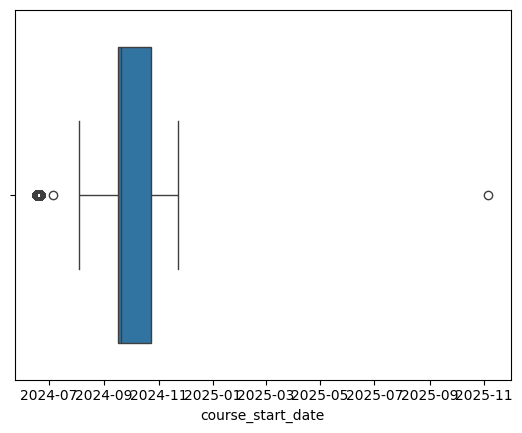

,course_id,course_name,subject_id,subject_name,subject_type,course_type_id,course_start_date,user_id,user_last_name,city_id,city_name,student_not_expelled,course_opening_date,user_course_month_count,homework_done_on_course_by_user
8293,46,Курс по итоговому сочинению ЕГЭ,4,Русский,ЕГЭ,3,2025-11-06,30498,Рафикова,1125,Ярославль,False,2024-11-04 15:45:24,0,0


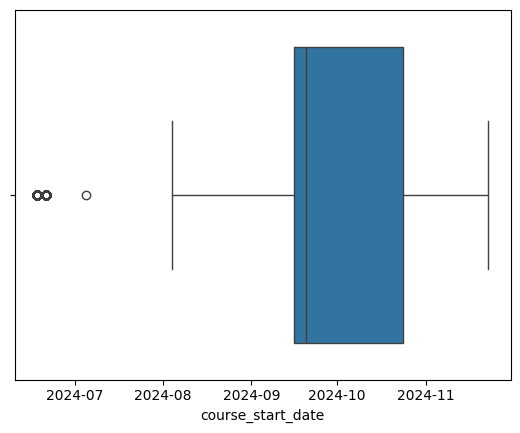

In [57]:
# Анализ аномальных значений (выбросов)
# Посмотрим описательную статистику
print(df.describe())
# Буду использовать визуальную проверку с помощью "ящика с усами" и метод межквартильного размаха при необходимости
# для обнаружения выбросов, интересуют такие показатели, как дата старта курса, дата записи на курс, количество
# месяцев курса и количество выполненных домашних заданий на курсе
sns.boxplot(x=df['course_start_date'])  # выбросы — это точки за усами
plt.show()
# Судя по графику, обнаружено довольно много выбросов по дате старта курса, если более ранние даты меня не беспокоят,
# т.к. соответствуют датам в других таблицах (например, есть домашние задания от июня 2024), то курс с датой 11.2025
# вызывает подозрения
Q1 = df['course_start_date'].quantile(0.25)
Q3 = df['course_start_date'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = df[(df['course_start_date'] > upper_bound)]
display(outliers)
# Видим, что на этом курсе указана дата записи на курс 4.11.2024, т.е. это описка, заменим год на 2024
df.loc[df['course_start_date'] == '2025-11-06', 'course_start_date'] = pd.to_datetime('2024-11-06')
# Проверяем, что выброс исчез
sns.boxplot(x=df['course_start_date'])  # выбросы — это точки за усами
plt.show()

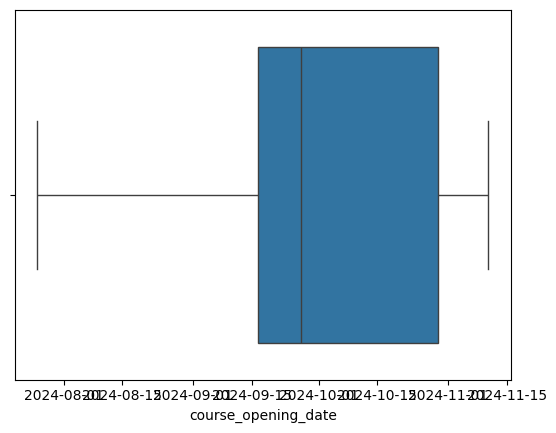

In [58]:
# и проверяем на выбросы другие столбцы
sns.boxplot(x=df['course_opening_date'])
plt.show()
# Выбросов не обнаружено

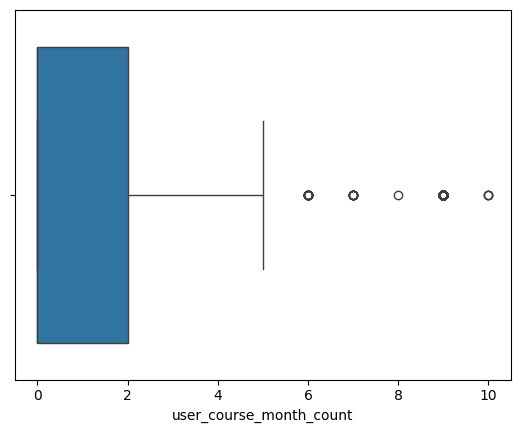

In [59]:
sns.boxplot(x=df['user_course_month_count'])
plt.show()
# Значений больше 12 не обнаружено, а т.к. у нас годовые курсы, считаем, что выбросов нет

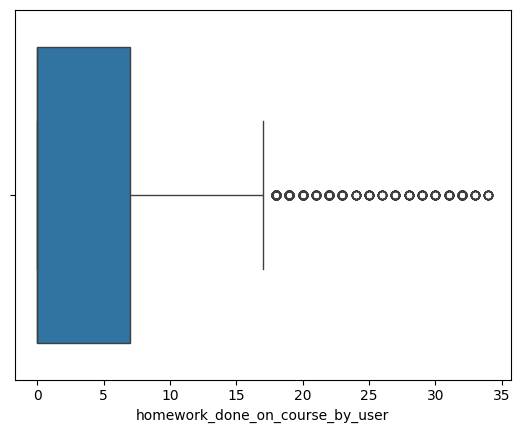

,course_id,course_name,subject_id,subject_name,subject_type,course_type_id,course_start_date,user_id,user_last_name,city_id,city_name,student_not_expelled,course_opening_date,user_course_month_count,homework_done_on_course_by_user
1737,17,Годовой 2к25 стандарт,2,Английский язык,ЕГЭ,1,2024-09-20,10816,Тюрникова,726,Уссурийск,True,2024-08-05 03:18:58,3,32
1738,17,Годовой 2к25 стандарт,2,Английский язык,ЕГЭ,1,2024-09-20,10824,Зайцев,720,Дальнегорск,True,2024-08-05 09:44:03,2,31
1740,17,Годовой 2к25 стандарт,2,Английский язык,ЕГЭ,1,2024-09-20,10828,Шулаева,759,Ростов-на-Дону,True,2024-08-05 08:13:14,3,29
1741,17,Годовой 2к25 стандарт,2,Английский язык,ЕГЭ,1,2024-09-20,25041,Рипкина,595,Мурманск,True,2024-09-22 20:40:49,2,23
1742,17,Годовой 2к25 стандарт,2,Английский язык,ЕГЭ,1,2024-09-20,25125,Суровая,644,Искитим,True,2024-09-16 11:49:11,2,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10124,56,Годовой 2к25 платинум,1,Обществознание,ЕГЭ,1,2024-09-16,28838,Филимонцев,1043,Сургут,True,2024-09-26 17:22:28,9,18
10128,56,Годовой 2к25 платинум,1,Обществознание,ЕГЭ,1,2024-09-16,28625,Хикканова,508,Москва,True,2024-09-25 17:22:28,2,18
10132,57,Годовой 2к25 платинум,2,Английский язык,ЕГЭ,1,2024-09-20,30894,Хижняк,508,Москва,True,2024-10-03 17:22:11,2,29
10133,57,Годовой 2к25 платинум,2,Английский язык,ЕГЭ,1,2024-09-20,28625,Хикканова,508,Москва,True,2024-09-25 17:22:28,2,34


In [60]:
sns.boxplot(x=df['homework_done_on_course_by_user'])
plt.show()
# Может ли быть на курсе от 17 до 35 домашних заданий? Выведем строки с выбросами
Q1 = df['homework_done_on_course_by_user'].quantile(0.25)
Q3 = df['homework_done_on_course_by_user'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = df[(df['homework_done_on_course_by_user'] > upper_bound)]
display(outliers)
# Как видно, таких значений достаточно много, не считаю их выбросами

In [61]:
# Деление учеников на волны проведём строго по дням с помощью отдельной функции
# Создадим (а после удалим) дополнительный столбец, в котором будет содержаться количество дней между присоединением ученика к курсу и началом курса (в виде целого числа int64)
df['days_between'] = (df['course_opening_date'] - df['course_start_date']).dt.days

# Создадим колонку с номером волны и запишем туда результат сравнения, используя функцию
def waves(days):
    if days <= 0:
        return 0
    elif days <= 7:
        return 1
    elif days <= 14:
        return 2
    elif days <= 21:
        return 3
    elif days <= 28:
        return 4
    else:
        return 5

df['wave'] = df['days_between'].apply(waves)
# Отобразим каждую волну
display(df[df['wave'] == 5].sort_values(by='days_between'))

,course_id,course_name,subject_id,subject_name,subject_type,course_type_id,course_start_date,user_id,user_last_name,city_id,city_name,student_not_expelled,course_opening_date,user_course_month_count,homework_done_on_course_by_user,days_between,wave
7953,43,Химическое равновесие,6,Химия,ЕГЭ,3,2024-08-23,25274,Карпухина,844,Екатеринбург,True,2024-09-21 07:29:24,0,0,29,5
8161,44,КОНСПЕКТЫ ПО ЗООЛОГИИ,10,Биология,ЕГЭ,3,2024-08-19,25773,Ленина,1113,Салехард,True,2024-09-17 17:46:20,0,0,29,5
8163,44,КОНСПЕКТЫ ПО ЗООЛОГИИ,10,Биология,ЕГЭ,3,2024-08-19,25906,Руслановна,552,Мытищи,True,2024-09-17 15:58:30,0,0,29,5
8162,44,КОНСПЕКТЫ ПО ЗООЛОГИИ,10,Биология,ЕГЭ,3,2024-08-19,25785,Сорокун,402,Енисейск,True,2024-09-17 13:20:57,0,0,29,5
8174,44,КОНСПЕКТЫ ПО ЗООЛОГИИ,10,Биология,ЕГЭ,3,2024-08-19,25453,Сагидова,362,Кострома,True,2024-09-17 11:58:20,0,0,29,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6466,35,Крепкий орешек,6,Химия,ЕГЭ,3,2024-06-21,30339,Воротникова,159,Воронеж,True,2024-10-29 22:05:27,0,0,130,5
6431,35,Крепкий орешек,6,Химия,ЕГЭ,3,2024-06-21,33126,Abramyan,742,Азов,True,2024-10-30 10:24:40,0,0,131,5
6478,35,Крепкий орешек,6,Химия,ЕГЭ,3,2024-06-21,30541,Патыка,761,Семикаракорск,True,2024-10-30 18:05:40,0,0,131,5
6425,35,Крепкий орешек,6,Химия,ЕГЭ,3,2024-06-21,30239,Ксенофонтов,991,Тула,True,2024-10-31 18:09:33,0,0,132,5


In [62]:
# Отобразим итоговый результат, удалив лишнюю колонку
df.drop(columns='days_between', inplace=True)
display(df)
# Сохраним в формате csv для загрузки в Yandex DataLens
df.to_csv('test_dataset.csv', index=False)

,course_id,course_name,subject_id,subject_name,subject_type,course_type_id,course_start_date,user_id,user_last_name,city_id,city_name,student_not_expelled,course_opening_date,user_course_month_count,homework_done_on_course_by_user,wave
0,16,Годовой 2к25 стандарт,1,Обществознание,ЕГЭ,1,2024-09-16,10233,Романова,786,Тольятти,True,2024-07-29 16:42:04,3,16,0
1,16,Годовой 2к25 стандарт,1,Обществознание,ЕГЭ,1,2024-09-16,10280,Зуева,796,Санкт-Петербург,True,2024-07-30 08:52:44,1,3,0
2,16,Годовой 2к25 стандарт,1,Обществознание,ЕГЭ,1,2024-09-16,10349,Никитина,844,Екатеринбург,True,2024-07-30 16:45:46,9,14,0
3,16,Годовой 2к25 стандарт,1,Обществознание,ЕГЭ,1,2024-09-16,10421,Галимзянова,316,Киселёвск,True,2024-07-31 11:17:10,2,15,0
4,16,Годовой 2к25 стандарт,1,Обществознание,ЕГЭ,1,2024-09-16,10532,Субботина,924,Тамбов,True,2024-07-31 18:22:07,2,17,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15339,104,СПЕЦКУРС ПО КАРТАМ,3,История,ЕГЭ,3,2024-11-10,33030,Лебедева,812,Саратов,True,2024-11-10 13:21:37,0,0,0
15340,104,СПЕЦКУРС ПО КАРТАМ,3,История,ЕГЭ,3,2024-11-10,33115,Ларгина,508,Москва,True,2024-11-10 13:21:37,0,0,0
15341,104,СПЕЦКУРС ПО КАРТАМ,3,История,ЕГЭ,3,2024-11-10,33284,Www,508,Москва,True,2024-11-10 13:21:37,0,0,0
15342,104,СПЕЦКУРС ПО КАРТАМ,3,История,ЕГЭ,3,2024-11-10,33560,Перловка,828,Холмск,True,2024-11-10 13:21:37,0,0,0
